# The Sparks Foundation - GRIP June 2021

## Task 2_Prediction using Unsupervised ML

### Author : Helana Kuriakose

## Problem statement

######  •	From the given ‘Iris’ dataset, predict the optimum number of clusters  and represent it visually. 

## Work Flow 

##### 1)	Data collection 

##### 2)	Data Pre-processing

##### 3)    Data visualisation

##### 4)	Data preperation

##### 5)	Choosing optimum number of clusters

##### 6)	KMeans model training

##### 7)	Visualising the clusters

### Importing libraries

In [1]:
# Importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data collection and Pre-processing

In [2]:
# loading dataset into pandas dataframe
iris_df = pd.read_csv("F:\python\Sparks datasets\Iris.csv")
print("Data set collected successfully")

Data set collected successfully


In [3]:
# check first 10 attributes
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Exploratory data analysis

In [4]:
# getting the shape of data set
iris_df.shape

(150, 6)

In [5]:
# getting the attributes
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# getting the datatypes 
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# getting the information about dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# removing the id
iris_df = iris_df.drop(['Id'], axis = 1)

In [9]:
# getting the statistical values 
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# checking the null values if any
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# checkin the duplicate values if any
iris_df.duplicated().sum()

3

In [12]:
# removing duplicated values
iris_df.drop_duplicates(inplace = True)

In [13]:
iris_df.shape

(147, 5)

### Data visualisation

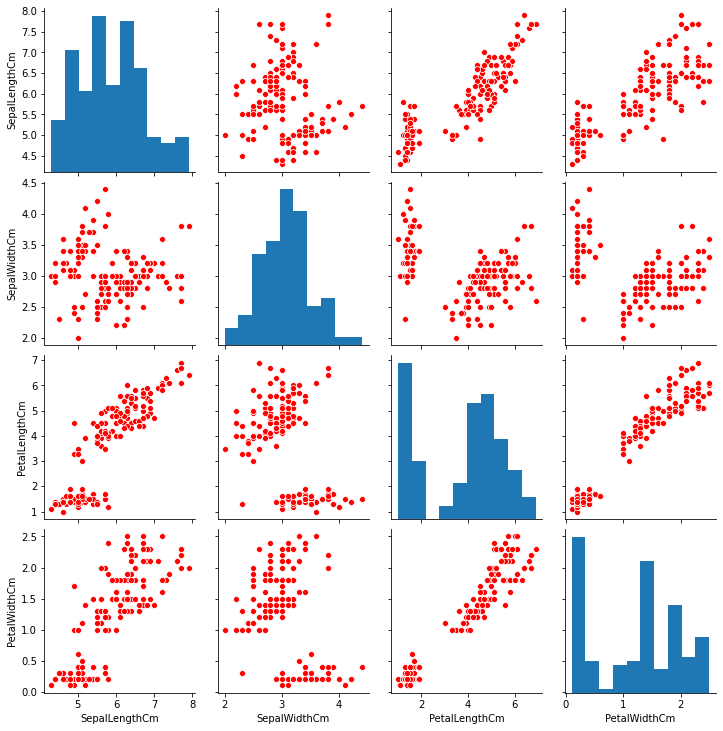

In [14]:
# pair plot
sns.pairplot(iris_df, plot_kws = {'color' : 'red'})

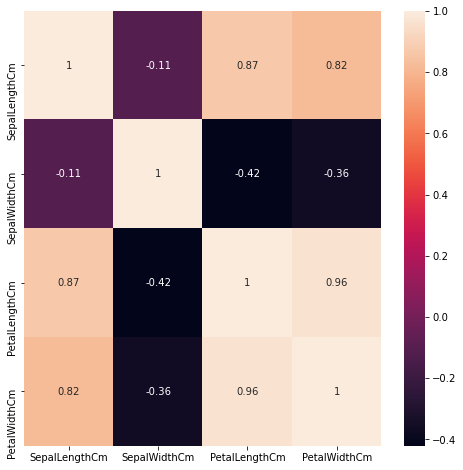

In [15]:
# heatmap
plt.figure(figsize = (8,8))
correlation = iris_df.corr()
sns.heatmap(correlation, annot = True)

### Data preperation

In [16]:
x = iris_df.iloc[:,0:4].values

In [17]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [18]:
target = iris_df['Species']

In [19]:
target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Choosing the optimum number of clusters

We need to find the optimum number of clusters.For choosing the number of clusters, we are using the parameter WCSS(Within Clusters Sum of Squares).In this we find the distance of the datapoints from the centeroid.It should be minimum.

In [20]:
# finding WCSS for different number of clusters
# for 10 clusters
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 3)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

In [21]:
WCSS

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.400902116402136,
 34.05305643335391,
 29.84458005121241,
 27.89125382709079,
 26.030901658526663]

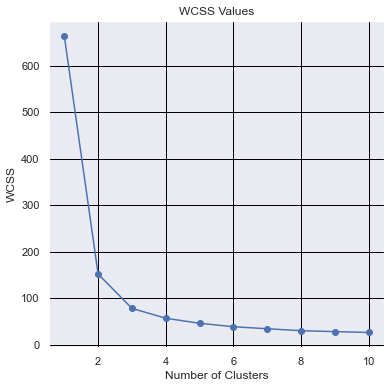

In [22]:
# plot the elbow graph to see which number of clusters has the minimum WCSS values
sns.set()  # gives basic parameters of the graph
plt.figure(figsize = (6,6))
plt.plot(range(1,11), WCSS, marker = 'o')
plt.title('WCSS Values')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(color = 'black')
plt.show()

#### Optimum number of clusters are 3.

### Model training

In [23]:
# training the K-Means clustering model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 13)

In [24]:
# return a label for each data points based on their clusters
y_pred = kmeans.fit_predict(x)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

### Visualising the clusters

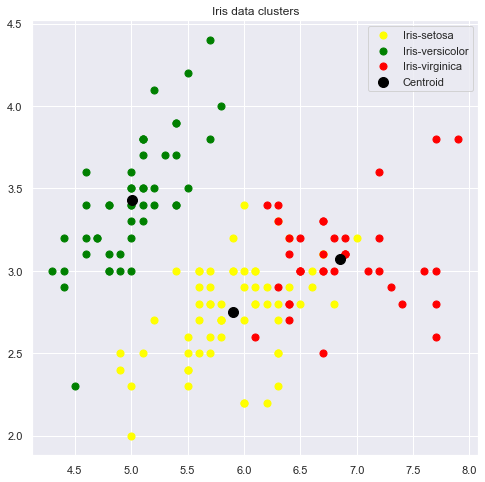

In [26]:
# plotting the datapoints and centroids
plt.figure(figsize=(8,8))
plt.scatter(x = x[y_pred==0,0], y = x[y_pred==0,1], s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x = x[y_pred==1,0], y = x[y_pred==1,1], s = 50, c = 'green', label = 'Iris-versicolor')
plt.scatter(x = x[y_pred==2,0], y = x[y_pred==2,1], s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c ='black', label = 'Centroid')
plt.title('Iris data clusters')
plt.legend()
plt.show()

### Conclusion

#### The Optimum number of clusters are 3

## Task 2 Completed !